In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [5]:
data['Class'].value_counts(normalize=False)

0    284315
1       492
Name: Class, dtype: int64

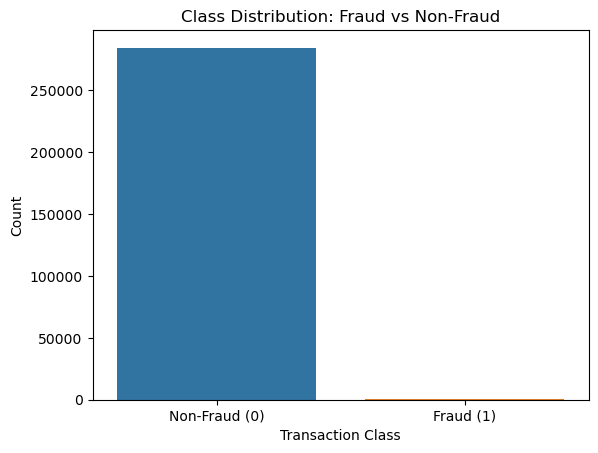

In [6]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()


In [7]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

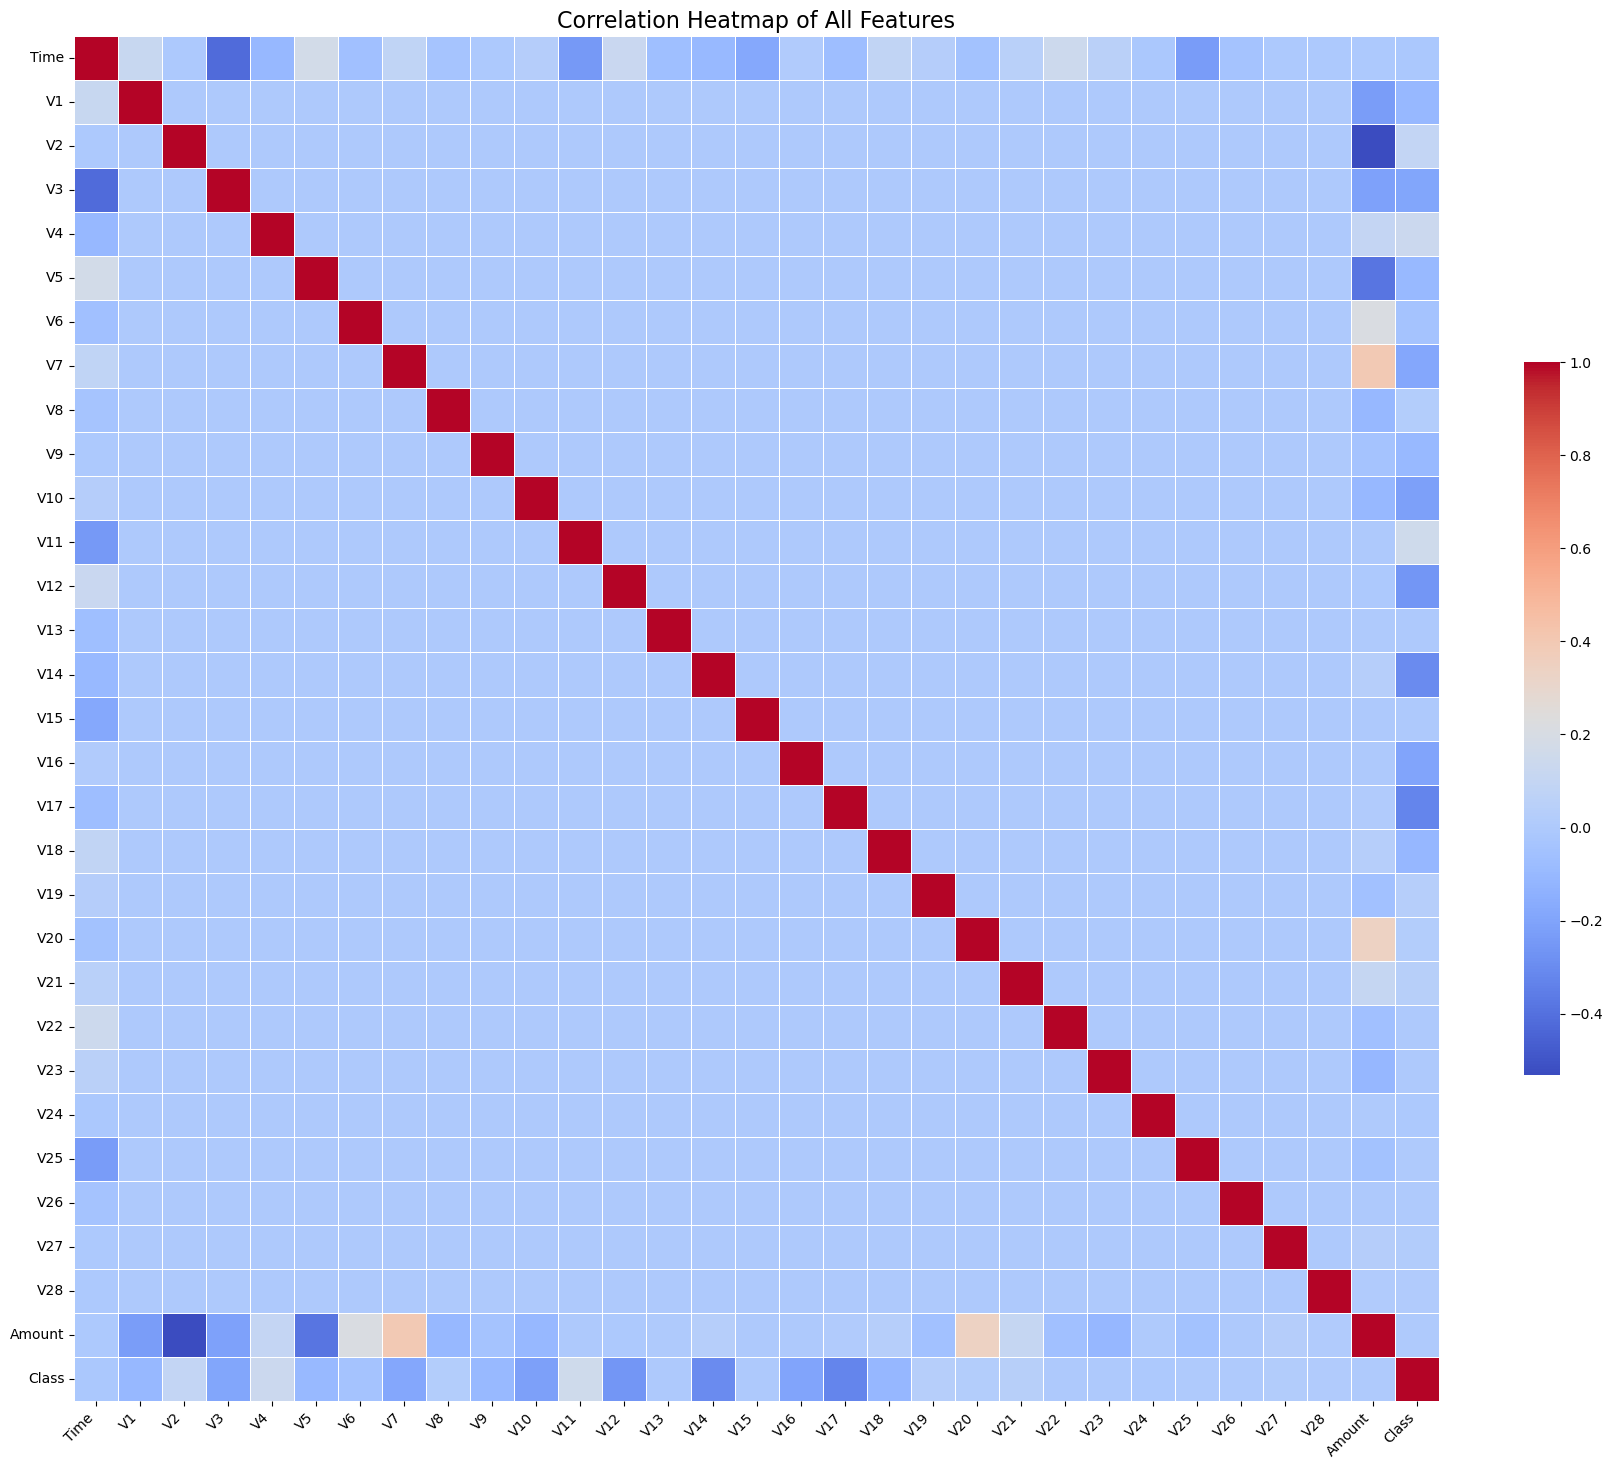

In [8]:
plt.figure(figsize=(18, 15)) 
sns.heatmap(data.corr(), 
            cmap='coolwarm', 
            annot=False,  #
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5})  
plt.title('Correlation Heatmap of All Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

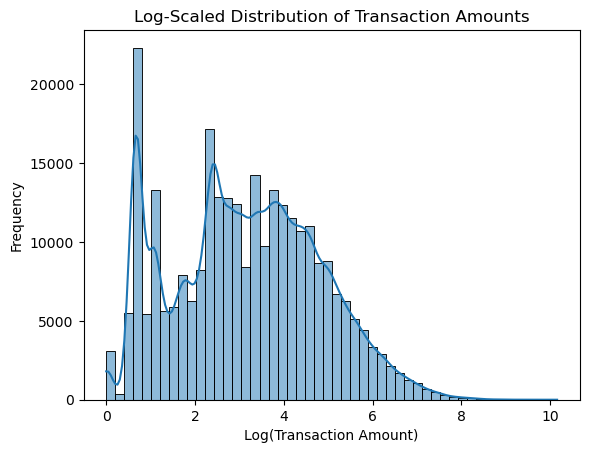

In [9]:
data['log_amount'] = np.log1p(data['Amount'])

sns.histplot(data['log_amount'], bins=50, kde=True)
plt.title('Log-Scaled Distribution of Transaction Amounts')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.show()

C:\Users\sagar\AppData\Local\Temp\ipykernel_21828\149924837.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 0]['V24'], label='Non-Fraud', shade=True)
C:\Users\sagar\AppData\Local\Temp\ipykernel_21828\149924837.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 1]['V24'], label='Fraud', shade=True, color='red')


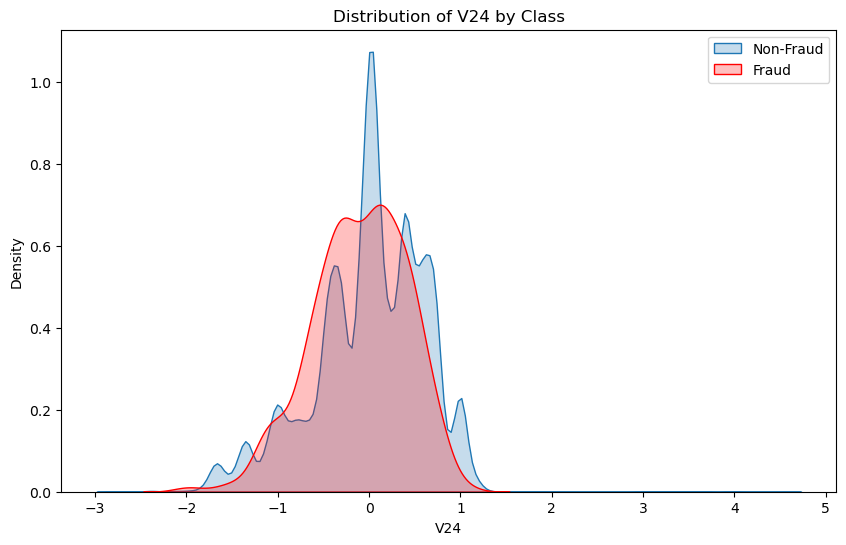

In [10]:
plt.figure(figsize=(10,6))
sns.kdeplot(data[data['Class'] == 0]['V24'], label='Non-Fraud', shade=True)
sns.kdeplot(data[data['Class'] == 1]['V24'], label='Fraud', shade=True, color='red')
plt.title('Distribution of V24 by Class')
plt.legend()
plt.show()


In [11]:
data.groupby('Class')['V14'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,0.012064,0.897007,-18.392091,-0.422453,0.051947,0.494104,10.526766
1,492.0,-6.971723,4.278940,-19.214325,-9.692723,-6.729720,-4.282821,3.442422


In [12]:
data.groupby('Class')['V24'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,0.000182,0.605776,-2.836627,-0.354425,0.041082,0.439869,4.584549
1,492.0,-0.105130,0.515577,-2.028024,-0.436809,-0.060795,0.285328,1.091435


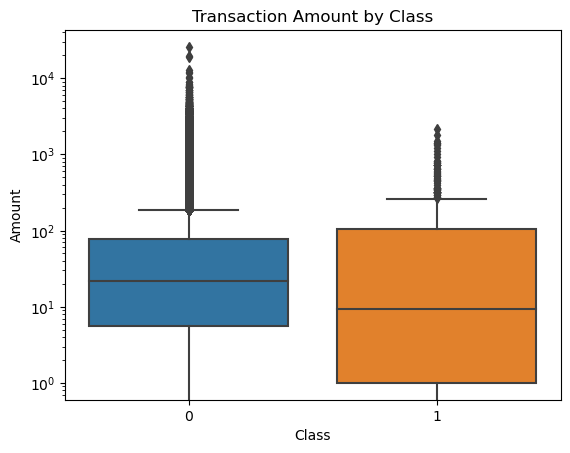

In [13]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.yscale('log') 
plt.title('Transaction Amount by Class')
plt.show()

In [14]:
data.isnull().sum()

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
log_amount    0
dtype: int64

In [15]:
data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


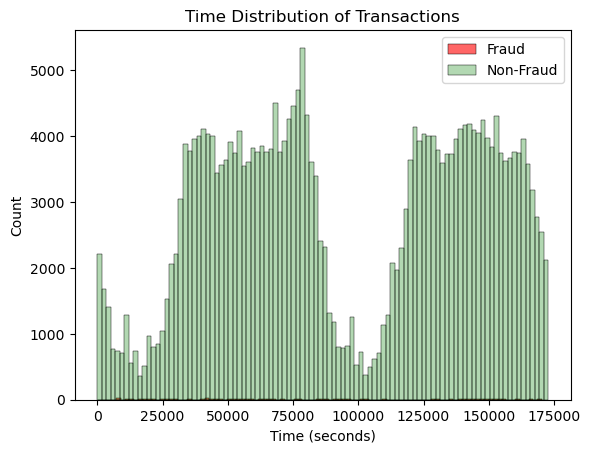

In [16]:
sns.histplot(data[data['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', alpha=0.6)
sns.histplot(data[data['Class'] == 0]['Time'], bins=100, color='green', label='Non-Fraud', alpha=0.3)
plt.title('Time Distribution of Transactions')
plt.xlabel('Time (seconds)')
plt.legend()
plt.show()


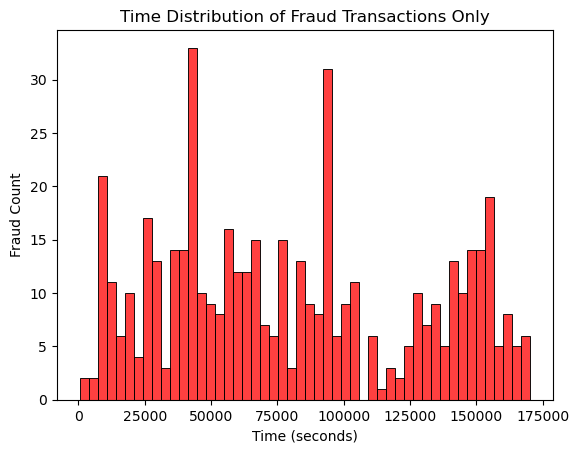

In [17]:
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red')
plt.title("Time Distribution of Fraud Transactions Only")
plt.xlabel("Time (seconds)")
plt.ylabel("Fraud Count")
plt.show()

In [18]:
data.var().sort_values(ascending=False).head(10)

Time          2.255124e+09
Amount        6.256007e+04
V1            3.836489e+00
log_amount    2.744484e+00
V2            2.726820e+00
V3            2.299029e+00
V4            2.004684e+00
V5            1.905081e+00
V6            1.774946e+00
V7            1.530401e+00
dtype: float64

#Logistic

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


X = data.drop(columns=["Class"])
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

log_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)

y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[85280    15]
 [   56    92]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.62      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9549174328205924


#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)
y_prob = svm_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[85292     3]
 [   56    92]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.62      0.76       148

    accuracy                           1.00     85443
   macro avg       0.98      0.81      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9382825583071788


#Decison Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

tree_pipeline.fit(X_train, y_train)

y_pred = tree_pipeline.predict(X_test)
y_prob = tree_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[85265    30]
 [   42   106]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.72      0.75       148

    accuracy                           1.00     85443
   macro avg       0.89      0.86      0.87     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8579322478583865


#RF

c:\Users\sagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


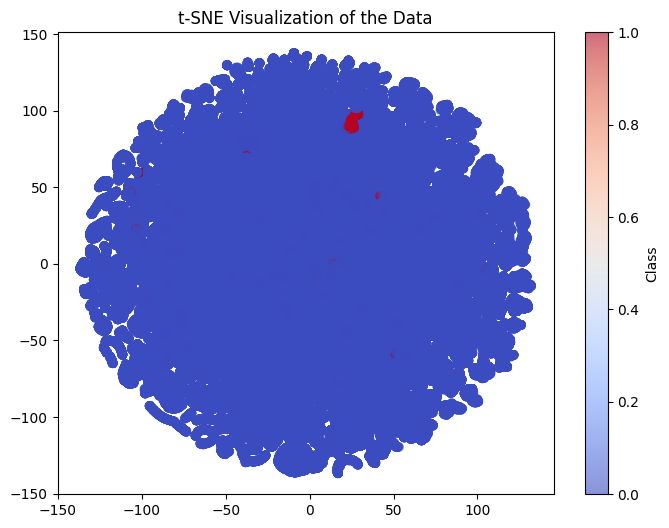

Confusion Matrix:
[[56859     5]
 [   17    81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score: 0.9528106983508091


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

data = pd.read_csv('creditcard.csv')

X = data.drop(['Class', 'Time'], axis=1)  
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)  
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, n_iter=1000, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('t-SNE Visualization of the Data')
plt.colorbar(label='Class')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print("\nROC-AUC Score:", roc_auc)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[85291     4]
 [   37   111]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.75      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9340985102577224


#XGBoost

In [25]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
y_prob = xgb_pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


c:\Users\sagar\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:17:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[85288     7]
 [   36   112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.92859883742116


#isolation Forest

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

iso_forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', IsolationForest(n_estimators=100, contamination=0.0017, random_state=42))
])

iso_forest_pipeline.fit(X_train)

y_pred_iso = iso_forest_pipeline.predict(X_test)

y_pred_iso = [1 if p == -1 else 0 for p in y_pred_iso]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_iso))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_iso))

Confusion Matrix:
[[85201    94]
 [  111    37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.28      0.25      0.27       148

    accuracy                           1.00     85443
   macro avg       0.64      0.62      0.63     85443
weighted avg       1.00      1.00      1.00     85443



#LOF

In [27]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

lof = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LocalOutlierFactor(n_neighbors=20, contamination=0.0017, novelty=False))
])

y_pred_lof = lof.fit_predict(X_test)

y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lof))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lof))


Confusion Matrix:
[[85151   144]
 [  146     2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.01      0.01      0.01       148

    accuracy                           1.00     85443
   macro avg       0.51      0.51      0.51     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

nn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=100, random_state=42))
])

nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)
y_prob = nn_model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
[[85283    12]
 [   42   106]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.72      0.80       148

    accuracy                           1.00     85443
   macro avg       0.95      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9420527010391597
